In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit import *
from qiskit.tools.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [12]:
# Classic

In [4]:
N = 15
a = 13

math.gcd(a, N)

1

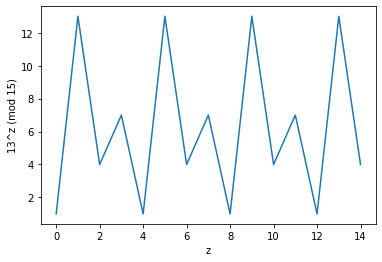

In [7]:
z = list(range(N))
y = [a**z0 % N for z0 in z]

plt.plot(z, y)
plt.xlabel("z")
plt.ylabel(f"{a}^z (mod {N})")
plt.show()

In [11]:
r = z[y[1:].index(1) + 1]
print(r)

if r % 2 == 0:
    x = (a**(r/2.)) % N
    print(f"x: {x}")
    if ( (x + 1) % N) != 0:
        print(math.gcd( (int(x) + 1), N), math.gcd( (int(x) - 1), N ))
    else:
        print("x + 1 is 0 (mod N)")
else:
    print("r is odd")

4
x: 4.0
5 3


In [13]:
# Quantum 

In [14]:
from qiskit.algorithms import Shor

In [15]:
quantum_instance = Aer.get_backend("qasm_simulator")
shor = Shor(quantum_instance=quantum_instance)

result = shor.factor(N = 15, a = 7)
print("factors: ", result.factors)

factors:  [[3, 5]]


In [25]:
def c_amod15(a, power):
    if a not in [2, 7, 8, 11, 13]:
        raise ValueError("a must be 2, 7, 8, 11 or 13")
    U = QuantumCircuit(4)
    for iteration in range(power):
        if a in [2, 13]:
            U.swap(0, 1)
            U.swap(1, 2)
            U.swap(2, 3)
        if a in [7, 8]:
            U.swap(2, 3)
            U.swap(1, 2)
            U.swap(0, 1)
        if a == 11:
            U.swap(1, 3)
            U.swap(0, 2)
        if a in [7, 11, 13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [26]:
n_count = 8
a = 7

In [27]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT Dagger"
    return qc

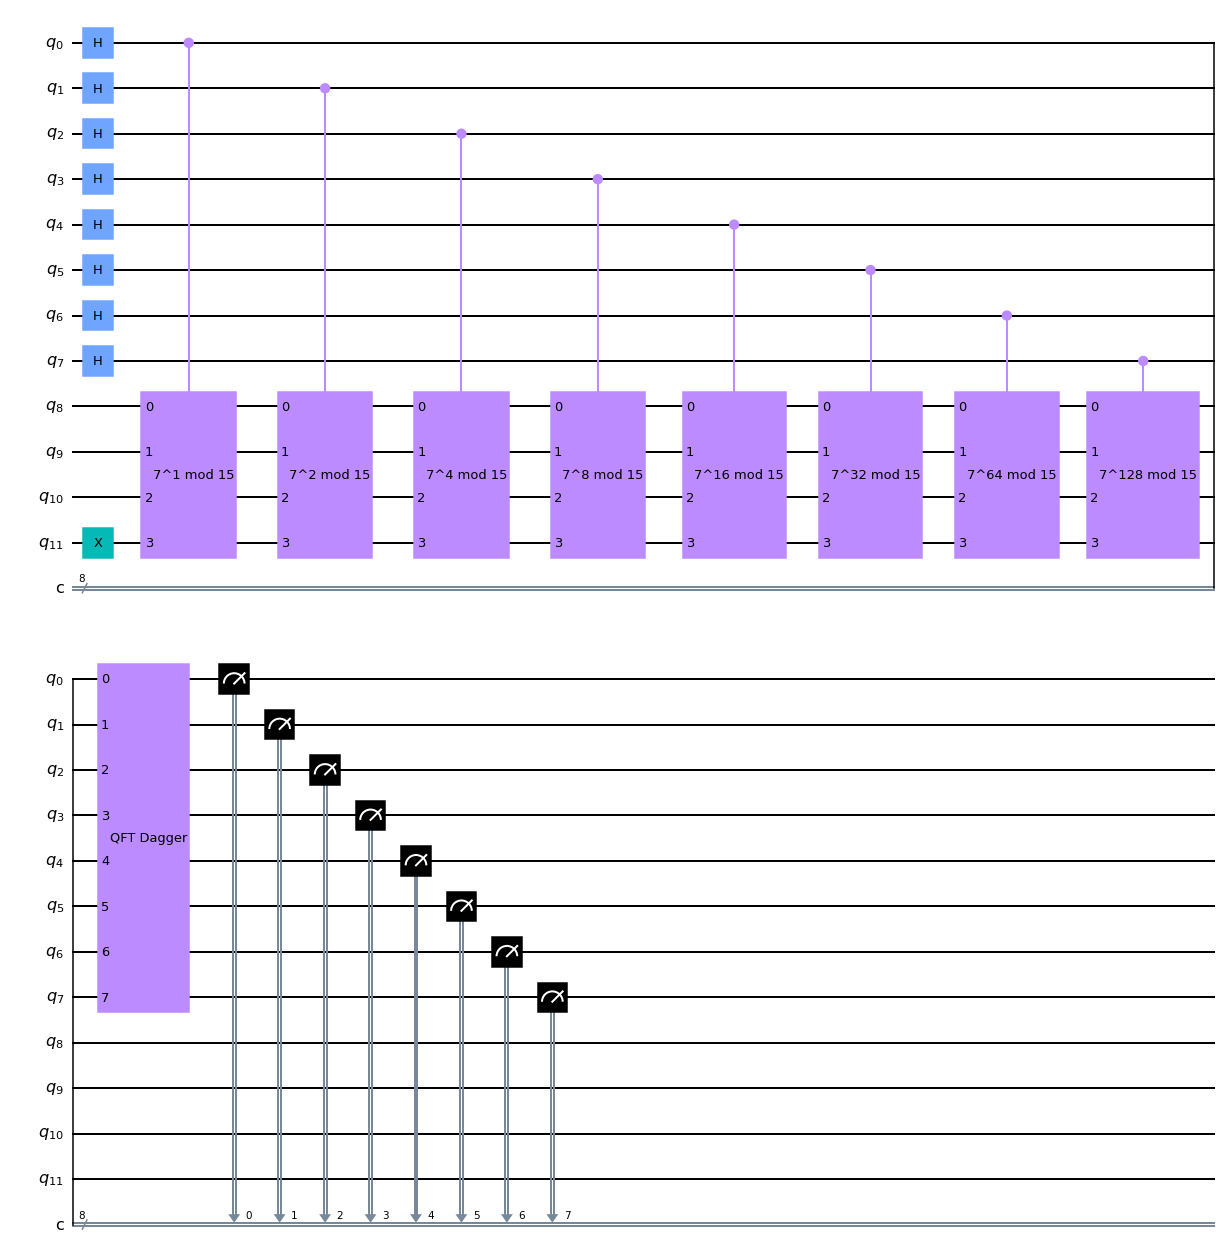

In [28]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    qc.h(q)
    
qc.x(3 + n_count)

for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q] + [i + n_count for i in range(4)])
    
qc.append(qft_dagger(n_count), range(n_count))

qc.measure(range(n_count), range(n_count))

qc.draw()

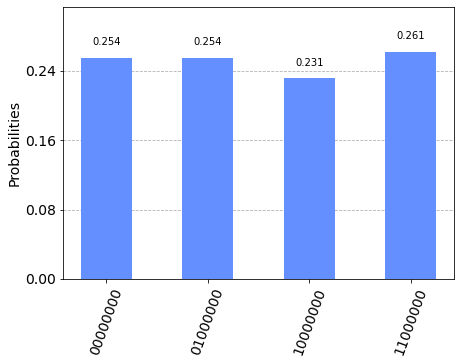

In [29]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc, backend=simulator, shots=1024).result()
plot_histogram([result.get_counts(qc)])